## Интеллектуальный анализ данных – весна 2025
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* Если в задании есть вопрос на рассуждение, то за отсутствие ответа на него балл за задание будет снижен вполовину.

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать с усеченным датасетом `Palmer Penguins`, содержащим информацию о характеристиках трех видов пингвинов: `Adelie`, `Chinstrap` и `Gentoo`:



*   Species — вид пингвина (целевая переменная).
*   Island — остров, на котором была сделана запись.
*   Clutch Completion — завершенность кладки яиц.
*   Date Egg — закодированная дата откладки яиц (число дней от самой ранней даты в данных).
*   Culmen Length (mm) — длина клюва.
*   Culmen Depth (mm) — глубина клюва.
*   Flipper Length (mm) — длина ласт.
*   Body Mass (g) — масса тела в граммах.
*   Sex — пол особи.
*   Delta 15 N (o/oo) и Delta 13 C (o/oo) — изотопные значения, характеризующие пищевые предпочтения.

Описание полного набора данных и дополнительную информацию о проекте можно найти [здесь](https://allisonhorst.github.io/palmerpenguins/index.html) и [здесь](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?resource=download).

![Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)



In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
data = pd.read_csv('penguins_data (1).csv')
data.head(10)

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap,Dream,Yes,382,50.9,19.1,196.0,3550.0,MALE,10.02372,-24.86594
1,Chinstrap,Dream,Yes,741,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433
2,Gentoo,Biscoe,Yes,744,46.5,13.5,210.0,4550.0,FEMALE,7.99530,-25.32829
3,Chinstrap,Dream,Yes,10,45.2,16.6,191.0,3250.0,FEMALE,9.62357,-24.78984
4,Gentoo,Biscoe,Yes,13,48.4,14.4,203.0,4625.0,FEMALE,8.16582,-26.13971
5,Gentoo,Biscoe,Yes,22,48.1,15.1,209.0,5500.0,MALE,8.45738,-26.22664
6,Gentoo,Biscoe,Yes,13,51.1,16.5,225.0,5250.0,MALE,8.20660,-26.36863
7,Gentoo,Biscoe,No,392,42.7,13.7,208.0,3950.0,FEMALE,8.14567,-26.59467
8,Adelie,Biscoe,Yes,14,39.6,20.7,191.0,3900.0,FEMALE,8.80967,-26.78958
9,Gentoo,Biscoe,Yes,735,46.1,13.2,211.0,4500.0,FEMALE,7.99300,-25.51390


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные признаки? Если да, то закодируйте их самым оптимальным способом. Аргументируйте свой выбор.

In [49]:
from sklearn.preprocessing import OrdinalEncoder
mv = data.isnull().sum()
print("Пропущенные значения в датасете:")
print(mv[mv > 0])
data = data.dropna()
data['Species'] = data['Species'].astype(str)
categorical = ['Species', 'Island', 'Clutch Completion', 'Sex']
species_order = [['Chinstrap'], ['Gentoo'], ['Adelie']]
ordinal_encoder = OrdinalEncoder(categories=[['Chinstrap', 'Gentoo', 'Adelie']])
data.loc[:, 'Species'] = ordinal_encoder.fit_transform(data[['Species']]).astype(int)
data = pd.get_dummies(data, columns=['Island', 'Clutch Completion', 'Sex'], drop_first=True)
data.head(10)

Пропущенные значения в датасете:
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64


<ipython-input-49-eb09e5320ff5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Species'] = data['Species'].astype(str)


,Species,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Dream,Island_Torgersen,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,0,382,50.9,19.1,196.0,3550.0,10.02372,-24.86594,True,False,True,False,True
1,0,741,45.2,17.8,198.0,3950.0,8.88942,-24.49433,True,False,True,True,False
2,1,744,46.5,13.5,210.0,4550.0,7.99530,-25.32829,False,False,True,True,False
3,0,10,45.2,16.6,191.0,3250.0,9.62357,-24.78984,True,False,True,True,False
4,1,13,48.4,14.4,203.0,4625.0,8.16582,-26.13971,False,False,True,True,False
5,1,22,48.1,15.1,209.0,5500.0,8.45738,-26.22664,False,False,True,False,True
6,1,13,51.1,16.5,225.0,5250.0,8.20660,-26.36863,False,False,True,False,True
7,1,392,42.7,13.7,208.0,3950.0,8.14567,-26.59467,False,False,False,True,False
8,2,14,39.6,20.7,191.0,3900.0,8.80967,-26.78958,False,False,True,True,False
9,1,735,46.1,13.2,211.0,4500.0,7.99300,-25.51390,False,False,True,True,False


имена пингвинов закодировала в ординальном порядке как и было указанно в задание, остальные категориальные признаки (island, sex, clutch) - One-Hot Encoding, чтобы избежать возможности неверной интерпритации данных моделью, то есть если бы мы использовали OrdinalEncoder, модель могла бы ошибочно интерпретировать, например, что остров "Dream" > остров "Torgersen", что не имеет смысла. А использование drop_first=True помогает уменшить размерность данных и предотвратить коллинеарность, то есть, например,  там где у нас в столбце island_dream = false и island_torgersen = false, модель и так автоматически понимает что это Biscoe, добавление нового столбца только увеличила бы память


(325, 12) (325,)


Целевую категориальную переменную закодируйте в ординальном порядке: Chinstrap = 0, Gentoo = 1, Adelie = 2. Можно воспользоваться [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).

Теперь сохраним информацию о признаках в переменную
`X`, а о целевой переменной – в переменную `y`.

In [58]:
from re import X
X = data.drop(columns=['Species'])
y = data['Species']
print(X.shape, y.shape)

(325, 12) (325,)


**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [59]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

stratify = y важно, потому что оно сохраняет пропорции классов в обучающей и тестовой выборках. Без него возможен дисбаланс, когда редкие классы окажутся недостаточно представлены, что ухудшит обучение модели и точность предсказаний

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака:  `Flipper Length (mm)` и `Body Mass (g)`  – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
y_train = y_train.astype(int)
y_test = y_test.astype(int)
X_train_selected = X_train[['Flipper Length (mm)', 'Body Mass (g)']]
X_test_selected = X_test[['Flipper Length (mm)', 'Body Mass (g)']]
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)
neighbors_list = [1, 3, 5, 10, 15, 25]
print("NN\tTrain\tTest")

for k in neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_train_pred = knn.predict(X_train_scaled)
    y_test_pred = knn.predict(X_test_scaled)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    print(f"{k}\t{train_acc:.2f}\t{test_acc:.2f}")

NN	Train	Test
1	0.97	0.74
3	0.86	0.76
5	0.83	0.78
10	0.82	0.78
15	0.81	0.76
25	0.79	0.84


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [ ]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [63]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

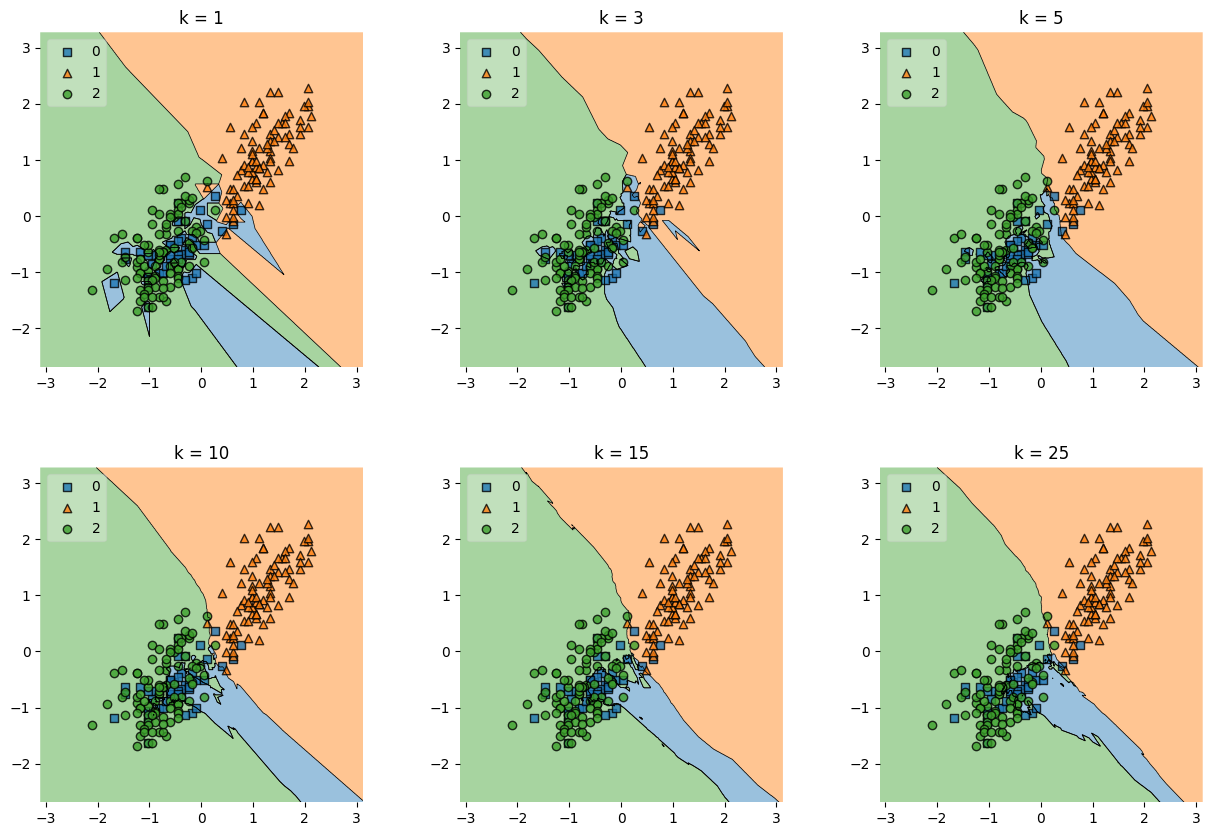

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
X_train_np = X_train_scaled
y_train_np = np.array(y_train)
neighbors_list = [1, 3, 5, 10, 15, 25]
classifiers = [KNeighborsClassifier(n_neighbors=k).fit(X_train_np, y_train_np) for k in neighbors_list]
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 3)
gs.update(wspace=0.3, hspace=0.3)
for clf, k, grd in zip(classifiers, neighbors_list, itertools.product(range(2), range(3))):
    ax = plt.subplot(gs[grd[0], grd[1]])
    plot_decision_regions(X_train_np, y_train_np, clf=clf, legend=2)
    ax.set_title(f"k = {k}")

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

для задачи 1.3:
k = 1: Очень высокая точность на обучающей выборке (0.97) и низкая на тестовой (0.74). Это явное переобучение — модель слишком точно запомнила тренировочные данные и плохо обобщает новые;
k = 3–15: Более сбалансированные значения. Например, при k = 5 или 10 точность на тестовой выборке достигает 0.78, что является хорошим результатом;
k = 25: Точность на тестовой выборке 0.84 — самая высокая! Но точность на тренировочной ниже, чем у других. Это признак недообучения — модель становится более гладкой.
задача 1.5:
k = 1: Граница сложной формы, слишком точно повторяет обучающие данные. Это переобучение;
k = 3, 5: Границы более сглажены, модель улавливает структуру данных, но без излишнего запоминания. На k = 5 как-будто вообще идеально;
k = 10, 15: Дальнейшее сглаживание границ, но классификация все еще остаётся точной;
k = 25: Границы очень плавные, модель недостаточно хорошо разделяет классы - недообучение.
Итог: оптимальное число соседей это 5 или 10

### Задание 2. KNN своими руками. 2,5 балла

**Задача 2.1 (2 балла)** В данном задании мы попробуем реализовать алгоритм KNN своими руками, делать мы будем KNN именно для классификации.

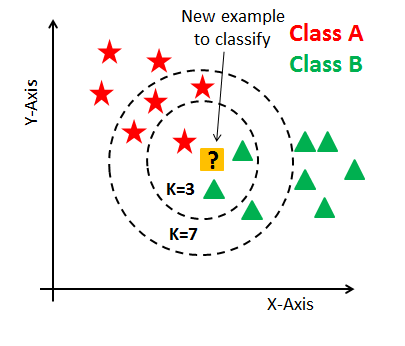

Рекомендации по реализации:
- Используйте `numpy` для представления данных в виде массивов, чтобы минимизировать преобразования.
- Избегайте циклов по всем объектам, по возможности используйте векторизированные операции.
- Обратите внимание на методы [np.linalg.norm()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) и [np.argsort()](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html), а также на класс `collections.Counter`.
- Особый плюс, если учтёте обработку возможных ошибок.

In [70]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
      self.X_train = np.array(X)
      self.y_train = np.array(y)
      # YOUR CODE HERE
      # (⌒_⌒;)

      pass

    def predict(self, X):
      X = np.array(X)
      predictions = []
      for x in X:
            distances = self.count_distance(x)
            nearest_indices = np.argsort(distances)[:self.k]
            nearest_labels = self.y_train[nearest_indices]
            most_common_label = Counter(nearest_labels).most_common(1)[0][0]
            predictions.append(most_common_label)

      return np.array(predictions)
      # YOUR CODE HERE
      # (＠_＠)

      pass

    def count_distance(self, x):
      return np.linalg.norm(self.X_train - x, axis=1)
      # YOUR CODE HERE
      # ヽ(♡‿♡)ノ

      pass

In [71]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [72]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

**Задача 2.2 (0.5 балла)** Протестируйте ваш алгоритм на данных о пингвинах. Выведите лучший получившийся результат на тестовой выборке.

In [76]:
neighbors_list = [1, 3, 5, 10, 15, 25]
best_k = None
best_acc = 0

for k in neighbors_list:
    knn = KNN(k=k)
    knn.fit(X_train_scaled, y_train)
    y_test_pred = knn.predict(X_test_scaled)
    test_acc = accuracy_score(y_test, y_test_pred)
    if test_acc > best_acc:
        best_acc = test_acc
        best_k = k

print(f"\nЛучший k = {best_k} с точностью {best_acc:.2f}")



Лучший k = 25 с точностью 0.84


### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [7]:
data = pd.read_csv('diamonds (1).csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [8]:
print("Пропущенные значения:")
print(data.isnull().sum())
data.drop(columns=["Unnamed: 0"], inplace=True)
data.head()

Пропущенные значения:
Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.2 (0.2 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Постройте матрицу корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки имеют наибольшую корреляцию с целевой переменной?

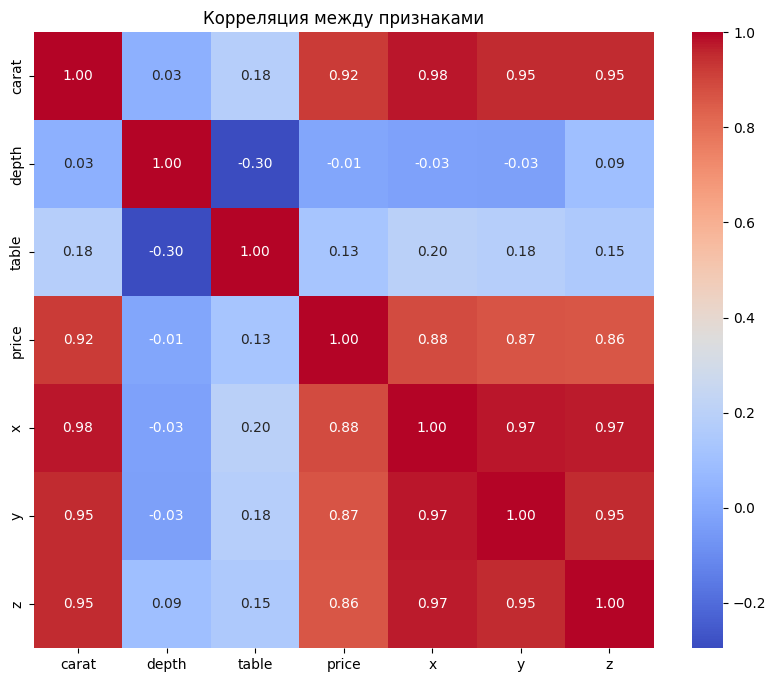

price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64


In [9]:
import seaborn as sns
n_data = data.select_dtypes(include=['number'])
corr_matrix = n_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляция между признаками")
plt.show()
print(corr_matrix["price"].sort_values(ascending=False))

**Задача 3.3 (0.2 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные признаки методом OneHot-кодирования (`pd.get_dummies()` или `OneHotEncoder` из `sklearn`).

In [10]:
data_onehot = pd.get_dummies(data,  columns=['cut', 'clarity', 'color'])
data_onehot

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,clarity_VS2,clarity_VVS1,clarity_VVS2,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,False,True,False,...,False,False,False,False,True,False,False,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,False,...,True,False,False,False,False,False,False,False,True,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,True,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,False,False,True,...,False,False,False,True,False,False,False,False,False,False
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,False,True,False,...,False,False,False,True,False,False,False,False,False,False
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,False,False,False,...,False,False,False,True,False,False,False,False,False,False
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,False,False,False,...,False,False,False,False,False,False,False,True,False,False


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [19]:
from sklearn.model_selection import train_test_split
X = data_onehot.drop(columns=["price"])
y = data_onehot["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("тренировочная:", X_train.shape, y_train.shape)
print("тестовая", X_test.shape, y_test.shape)

тренировочная: (37758, 26) (37758,)
тестовая (16182, 26) (16182,)


**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче стандартизируйте вещественные признаки в тренировочной и тестовой выборках с помощью `StandardScaler`.

Объясните, как это повлияет на интерпретацию коэффициентов линейной регрессии.

Стандартизация делает коэффициенты линейной регрессии сопоставимыми, так как теперь все признаки имеют одинаковый масштаб (среднее 0, стандартное отклонение 1). Однако их интерпретация меняется, до стандартизации коэффициент показывает  насколько изменится price при увеличении признака на 1 в исходных единицах, а после стандартизации коэффициент показывает насколько изменится price при увеличении признака на 1 стандартное отклонение

In [13]:
from sklearn.preprocessing import StandardScaler
numerical_features = data_onehot.select_dtypes(include=['number']).columns.drop('price')
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])
X_train_scaled.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,clarity_VS2,clarity_VVS1,clarity_VVS2,color_D,color_E,color_F,color_G,color_H,color_I,color_J
19497,0.862659,-0.311437,-0.207099,1.055581,0.986556,0.968253,False,False,True,False,...,False,False,True,False,False,False,False,True,False,False
31229,-1.029889,0.178549,-0.656213,-1.207734,-1.202544,-1.168276,False,False,True,False,...,True,False,False,False,True,False,False,False,False,False
22311,0.862659,0.458541,-0.207099,0.904099,0.951670,0.982309,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
278,0.021527,0.598537,-1.105327,0.164512,0.192898,0.251391,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
6646,-0.020530,-0.031445,-0.656213,0.182333,0.184176,0.181110,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False


**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print("Среднеквадратичная ошибка на тренировочной выборке:", mse_train)
print("Среднеквадратичная ошибка на тестовой выборке:", mse_test)

Среднеквадратичная ошибка на тренировочной выборке: 1290541.9147450614
Среднеквадратичная ошибка на тестовой выборке: 1244765.4357158695


**Задача 3.7 (0.3 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [15]:
feature_names = X_train.columns
coefficients = model.coef_
coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})
coef_df["Abs_Coefficient"] = coef_df["Coefficient"].abs()
coef_df_sorted = coef_df.sort_values(by="Abs_Coefficient", ascending=False)
coef_df_sorted.head(20)

,Feature,Coefficient,Abs_Coefficient
0,carat,5338.615671,5338.615671
11,clarity_I1,-3889.609765,3889.609765
12,clarity_IF,1569.427535,1569.427535
25,color_J,-1546.675235,1546.675235
17,clarity_VVS1,1211.725416,1211.725416
18,clarity_VVS2,1138.685765,1138.685765
14,clarity_SI2,-1107.669217,1107.669217
3,x,-1100.418850,1100.418850
19,color_D,835.314553,835.314553
15,clarity_VS1,768.224542,768.224542


Чистота (clarity) и вес (carat) — два ключевых фактора, определяющих цену бриллианта и оказывающее на нее самое большое влияние, что в целом логично. Цвет оказывает отрицательное влияние, и чем желтее бриллиант, тем ниже его стоимость (чем ближе буква обознаяающая цвет к D- тем прозрачнее бриллиант и тем он дороже); остальные параметры влияют на цену в меньшей степени.

**Задача 3.8 (0.5 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, установив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [26]:
from sklearn.linear_model import Lasso, Ridge
lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)
lasso_coefs = pd.DataFrame({'Feature': X_train.columns, 'Lasso_Coefficient': lasso.coef_})

ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)
ridge_coefs = pd.DataFrame({'Feature': X_train.columns, 'Ridge_Coefficient': ridge.coef_})

coefs_comparison = pd.merge(lasso_coefs, ridge_coefs, on='Feature')
coefs_comparison.sort_values(by="Ridge_Coefficient", key=abs, ascending=False)


,Feature,Lasso_Coefficient,Ridge_Coefficient
0,carat,9740.135250,10926.120568
11,clarity_I1,-3609.948307,-3807.614444
12,clarity_IF,733.827619,1552.674043
25,color_J,-1626.337523,-1528.614604
17,clarity_VVS1,547.239568,1202.623388
18,clarity_VVS2,515.847522,1128.074671
14,clarity_SI2,-1523.576973,-1113.013880
3,x,-458.310945,-860.318086
19,color_D,349.255341,827.445949
15,clarity_VS1,154.972746,754.102169


После Lasso и Ridge большая часть коэффициентов заметно уменьшилась (например, clarity_IF снизился до 733 в Lasso и 1552 в Ridge).Это говорит о том, что в исходной модели были избыточные зависимости между переменными, которые увеличивали веса.В Lasso-регрессии некоторые коэффициенты занулились (z, y, clarity_SI1 и др.) Это явный признак сильной мультиколлинеарности, так как Lasso стремится к разреженной модели, удаляя коррелированные признаки.В Ridge и Lasso коэффициент carat увеличился, что говорит о том, что в исходной модели его влияние было размазано между коррелирующими признаками (размеры бриллианта и другие характеристики). После подавления мультиколлинеарности модель перераспределила веса, и carat стал ключевым предиктором.

**Задача 3.9 (0.5 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод сильнее снижает норму коэффициентов? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.663e+07, tolerance: 6.061e+07
  model = cd_fast.enet_coordinate_descent(


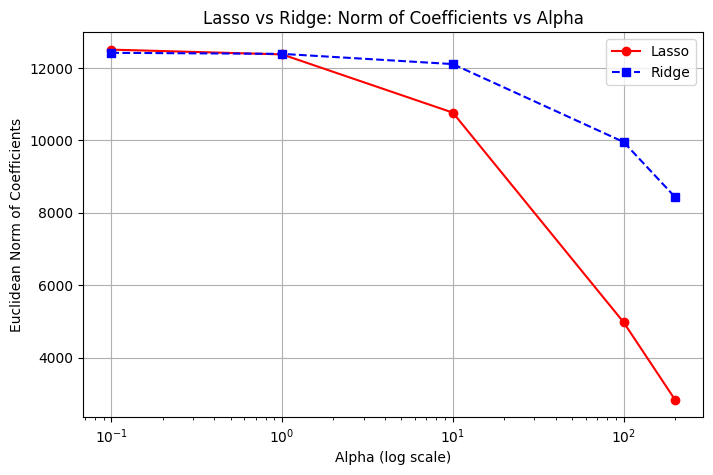

In [27]:
alpha_values = [0.1, 1, 10, 100, 200]
lasso_norms = []
ridge_norms = []

for alpha in alpha_values:

    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_norms.append(np.linalg.norm(lasso.coef_))

    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_norms.append(np.linalg.norm(ridge.coef_))

plt.figure(figsize=(8, 5))
plt.plot(alpha_values, lasso_norms, marker='o', label="Lasso", linestyle='-', color='red')
plt.plot(alpha_values, ridge_norms, marker='s', label="Ridge", linestyle='--', color='blue')
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("Euclidean Norm of Coefficients")
plt.title("Lasso vs Ridge: Norm of Coefficients vs Alpha")
plt.legend()
plt.grid()
plt.show()


1)Lasso быстрее уменьшает норму коэффициентов и обнуляет их при больших α, Ridge снижает норму плавнее, но не зануляет коэффициенты. 2)Lasso зануляет коэффициенты малозначимых признаков. Это позволяет автоматически исключать нерелевантные признаки, что делает модель более интерпретируемой. Ridge просто уменьшает значения коэффициентов, но не обнуляет их. Поэтому Lasso подходит для отбора признаков, а Ridge — для борьбы с мультиколлинеарностью.

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

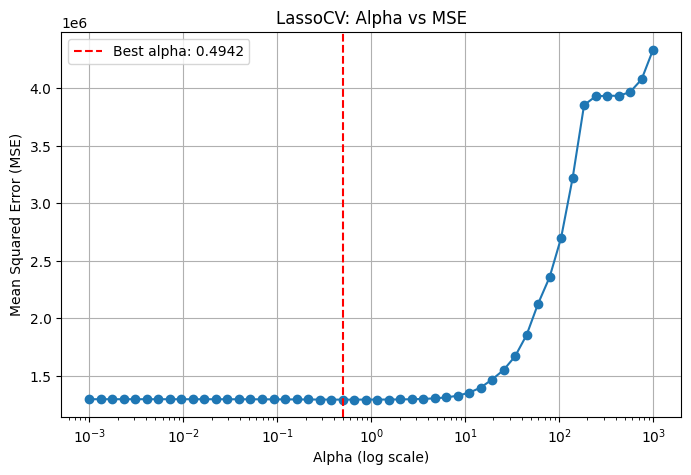

0.49417133613238334


In [28]:
from sklearn.linear_model import LassoCV

alpha_values = np.logspace(-3, 3, 50)
lasso_cv = LassoCV(alphas=alpha_values, cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)

mean_mse = np.mean(lasso_cv.mse_path_, axis=1)
best_alpha = lasso_cv.alpha_

plt.figure(figsize=(8, 5))
plt.plot(lasso_cv.alphas_, mean_mse, marker='o', linestyle='-')
plt.axvline(best_alpha, color='red', linestyle='--', label=f'Best alpha: {best_alpha:.4f}')
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("LassoCV: Alpha vs MSE")
plt.legend()
plt.grid()
plt.show()

print(best_alpha)


**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

          Feature  Lasso_Coefficient  Abs_Coefficient
0           carat       11152.979824     11152.979824
11     clarity_I1       -4397.264208      4397.264208
25        color_J       -1869.091753      1869.091753
14    clarity_SI2       -1649.871682      1649.871682
12     clarity_IF        1006.534755      1006.534755
24        color_I        -968.540262       968.540262
3               x        -957.950463       957.950463
6        cut_Fair        -728.527594       728.527594
13    clarity_SI1        -683.665960       683.665960
17   clarity_VVS1         657.240940       657.240940
18   clarity_VVS2         586.238241       586.238241
23        color_H        -494.604237       494.604237
19        color_D         492.994463       492.994463
20        color_E         278.041264       278.041264
21        color_F         222.158498       222.158498
15    clarity_VS1         216.290078       216.290078
7        cut_Good        -142.581972       142.581972
8       cut_Ideal         10

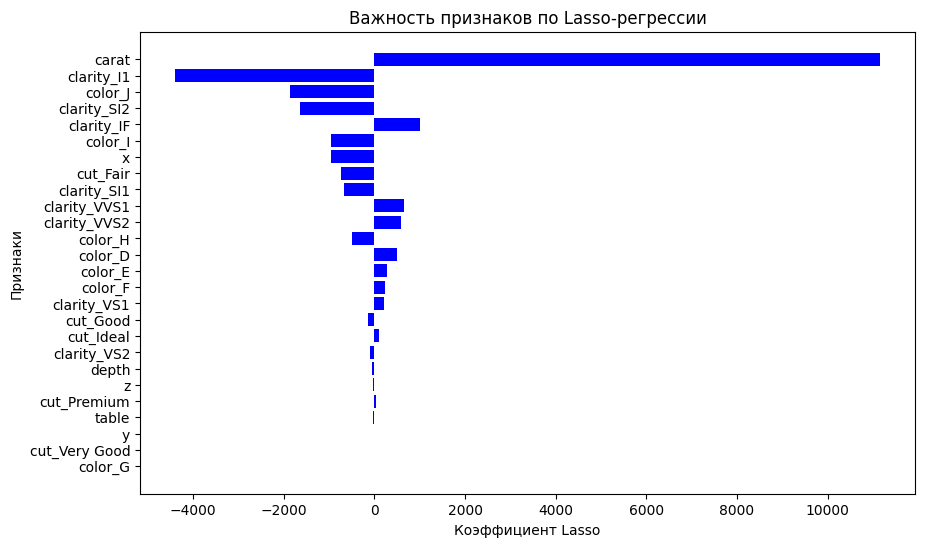

In [29]:
from sklearn.linear_model import Lasso
final_lasso = Lasso(alpha=best_alpha)
final_lasso.fit(X_train, y_train)
feature_names = X_train.columns
lasso_coefficients = final_lasso.coef_
lasso_coef_df = pd.DataFrame({"Feature": feature_names, "Lasso_Coefficient": lasso_coefficients})
lasso_coef_df["Abs_Coefficient"] = lasso_coef_df["Lasso_Coefficient"].abs()

lasso_coef_sorted = lasso_coef_df.sort_values(by="Abs_Coefficient", ascending=False)
print(lasso_coef_sorted)

plt.figure(figsize=(10, 6))
plt.barh(lasso_coef_sorted["Feature"], lasso_coef_sorted["Lasso_Coefficient"], color='b')
plt.xlabel("Коэффициент Lasso")
plt.ylabel("Признаки")
plt.title("Важность признаков по Lasso-регрессии")
plt.gca().invert_yaxis()
plt.show()


Признаки с нулевыми коэффициентами - неинформативные (Lasso их занулило), а признаки с наибольшими коэффициентами - наиболее важные.

Возможное смысловое объяснение:
Например, если carat (вес бриллианта) и clarity (чистота) остались с крупными коэффициентами, это логично, так как они сильно влияют на цену, а если коэффициенты цвета (например, color_G) уменьшились или занулились, значит, модель посчитала их влияние незначительным.

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [33]:
from sklearn.metrics import mean_squared_error
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
y_pred_lasso = final_lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print('Среднеквадратичная ошибка (MSE) для Lasso-регрессии:', mse_lasso)
print('Среднеквадратичная ошибка (MSE) для обычной линейной регрессии:', mse_linear)


Среднеквадратичная ошибка (MSE) для Lasso-регрессии: 1244456.7908283172
Среднеквадратичная ошибка (MSE) для обычной линейной регрессии: 1244765.43571587


Если Lasso-регрессия существенно снижает MSE, значит, удаление лишних признаков помогло модели избежать переобучения. Если MSE почти одинаковые, но Lasso использует меньше признаков, то она предпочтительнее – модель проще, быстрее и менее подвержена шуму. Обычная линейная регрессия может переобучаться из-за коррелирующих признаков, а Lasso их зануляет.